In [ ]:
# I mentioned that the most common supervised learning tasks are regression (predicting values) and classification (predicting classes).

In [ ]:
#we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Cen‐sus Bureau. 
#Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “hello world” of Machine Learning: whenever
#people come up with a new classification algorithm they are curious to see how it will perform on MNIST

In [ ]:
#Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the MNIST dataset

In [4]:
from sklearn.datasets import fetch_openml

In [5]:
mnist=fetch_openml('mnist_784', version=1)
mnist.keys()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
x,y=mnist['data'], mnist['target']

In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:

#There are 70,000 images, each with 784 features, since each 28 × 28 pixel image has one feature per pixel, 
#representing intensity from 0 (white) to 255 (black). 
#To view an image, reshape its feature vector to a 28 × 28 array and display it using Matplotlib’s imshow() function.

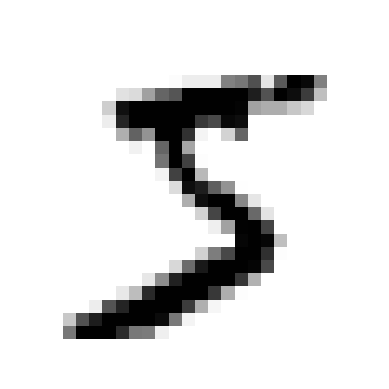

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = x.iloc[0].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [11]:
y.iloc[0]

'5'

In [12]:
#Note that the label is a string. Most ML algorithms expect numbers, so let’s cast y to integer:
import numpy as np
y = y.astype(np.uint8)

In [13]:
# lets split the data into testing and traingin, 
X_train, X_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]


In [14]:
#Training a Binary Classifier
#Let's focus on a simpler task for now: identifying one specific digit, such as the number 5.
#This "5-detector" will be a binary classifier, which means it can classify between two categories: 
#images of the digit 5 and images of digits that are not 5. 
#We'll create target vectors that define these two classes for our classification task.

In [15]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [14]:
#A good starting point is the SGDClassifier from Scikit-Learn, ideal for efficiently handling large datasets. 
#It processes training instances independently, making it suitable for both batch and online learning.
#Let's create and train an SGDClassifier on the full training set.

In [15]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [16]:
sgd_clf.predict([some_digit])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [17]:
#The classifier guesses that this image represents a 5 (True). Looks like it guessed right
# let's evaluate the model
# Performance Measures

In [18]:
# different evalution measurement instruments available, let's try
#Measuring Accuracy Using Cross-Validation

In [19]:
#In these cases, you can implement cross-validation
#yourself. The following code does roughly the same thing as Scikit-Learn’s
#cross_val_score() function, and it prints the same result:

X_train = X_train.to_numpy()
y_train_5 = y_train_5.to_numpy()


from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
 clone_clf = clone(sgd_clf)
 X_train_folds = X_train[train_index]
 y_train_folds = y_train_5[train_index]
 X_test_fold = X_train[test_index]
 y_test_fold = y_train_5[test_index]
 clone_clf.fit(X_train_folds, y_train_folds)
 y_pred = clone_clf.predict(X_test_fold)
 n_correct = sum(y_pred == y_test_fold)
 print(n_correct / len(y_pred)) 

0.9669
0.91625
0.96785


In [20]:
#using sklearn libaray to evalute
#Let's evaluate our SGDClassifier model using K-fold cross-validation with three folds. 
#This method involves splitting the training set into three folds, making predictions, and evaluating them using a model trained on the other folds.

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [22]:
#Confusion Matrix
#A better way to see how well a classifier is working is to use a confusion matrix.
#This matrix shows how often each class is mistaken for another class.

#To create a confusion matrix, you need a set of predictions to compare with the actual results. 
#Instead of using the test set (which you should save for final evaluation), 
#you can use the cross_val_predict() function to make predictions during cross-validation.

In [23]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
#Now you are ready to get the confusion matrix using the confusion_matrix() func‐tion. 
#Just pass it the target classes (y_train_5) and the predicted classes(y_train_pred):

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [ ]:
# A perfect classifier would have only true positives and true
#negatives, so its confusion matrix would have nonzero values only on its main diago‐nal (top left to bottom right):


In [25]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [ ]:
#The confusion matrix gives you a lot of information, but sometimes you may prefer a
#more concise metric. An interesting one to look at is the accuracy of the positive pre‐dictions; this is called the precision of the classifier
#precision = TP/(TP + FP) TP is the number of true positives, and FP is the number of false positives.

In [39]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [40]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [41]:
#To compare two classifiers, it's useful to combine precision and recall into a single metric called the F1 score. 
#The F1 score is the harmonic mean of precision and recall. Unlike the regular mean, the harmonic mean gives more weight to low values.
#This means a classifier will only get a high F1 score if both its precision and recall are high.

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7325171197343846

In [1]:
#Multiclass Classification
#Some algorithms, like SGD classifiers, Random Forest classifiers, and naive Bayes classifiers, can handle multiple classes naturally.
#Others, like Logistic Regression or Support Vector Machines, are only binary classifiers. However, you can use different strategies to make them work for multiclass classification.
#One way to classify digit images into 10 classes (0 to 9) is to train 10 binary classifiers, one for each digit
#To classify an image, get the decision score from each classifier and choose the class with the highest score. This is called the one-versus-the-rest (OvR) strategy.

In [ ]:
#Another strategy, called the one-versus-one (OvO) strategy, is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another for 0s and 2s, another for 1s and 2s, and so on.

In [ ]:
#Some algorithms, like Support Vector Machines, don't handle large training sets well. 
#For these, OvO is preferred because it's faster to train many classifiers on small sets. 
#For most binary classifiers, OvR is preferred. Scikit-Learn detects when you use a binary classifier for a multiclass task and automatically runs OvR or OvO based on the algorithm.
#Let's try this with a Support Vector Machine using sklearn.svm.SVC

In [2]:
from sklearn.svm import SVC

In [16]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
svm_clf.predict([some_digit])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [17]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])